In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

# import os

# # !pip install fire
# # !pip install tqdm

# home_dir = '/content/gdrive/My Drive/A0/aispace'
# os.chdir(home_dir)
# !pwd

# import os
# # Get the current working directory
# current_directory = os.getcwd()
# print(current_directory)

# import shutil
# import os

In [ ]:
# !pip install rasterio
# !pip install accelerate
# !pip install peft
# !pip install transformers
# # !pip install transformers==4.33.0
# !pip install datasets

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

In [2]:
import json

chkpt_list = [30000, 30000, 30000, 30000, 12000, 9000, 11000]
chkpt_list = [8000, 8000, 8000, 16000, ] #8000, 8000, 13000]
chkpt_list = [32000, 32000, 64000, 32000, 28000, 28000, 28000]    # 32000] # 20000, 4000] #8000, 8000, 13000]
chkpt_list = [7000, 105000, 71000, ]

!pwd

EXP_NAME = f'A0[optim_sophia]'
EXP_NAME = f'A0[great_sophia]'

learning_rates_all = []
losses_all = []
steps_all = [0,]
for ii, chkpt in enumerate(chkpt_list):  # range(4):
    json_file = f'./{EXP_NAME}/run[{ii}]/checkpoint-{chkpt}/trainer_state.json'
    # json_file = f'./A0[float]/run[{ii}]/checkpoint-30000/trainer_state.json'
    # json_file = f'./checkpoint-25000/trainer_state.json'
    # Open the JSON file for reading
    with open(json_file, 'r') as json_file:
        data = json.load(json_file)

        display(data['log_history'][-1])


    data = data['log_history']

    # Extract 'learning_rate', 'loss', and 'step' values from the data
    learning_rates = [item['learning_rate'] for item in data]
    losses = [item['loss'] for item in data]
    steps = [item['step'] for item in data]

    learning_rates_all.extend(learning_rates)
    losses_all.extend(losses)

    shift_step = steps_all[-1]
    shifted_steps = [step + shift_step for step in steps]
    steps = shifted_steps
    steps_all.extend(steps)


display(data[0])

steps_all.pop(0)

# print(len(losses_all), len(steps_all), steps_all)

/home


{'epoch': 200.0, 'learning_rate': 2e-08, 'loss': 2.2992, 'step': 7000}

{'epoch': 3000.0, 'learning_rate': 0.0001, 'loss': 0.3377, 'step': 105000}

{'epoch': 2218.75, 'learning_rate': 5e-05, 'loss': 0.3291, 'step': 71000}

{'epoch': 6.25, 'learning_rate': 5e-05, 'loss': 0.3345, 'step': 200}

0

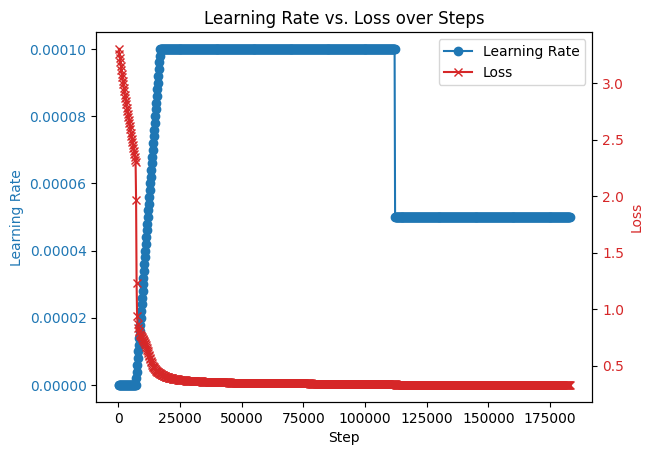

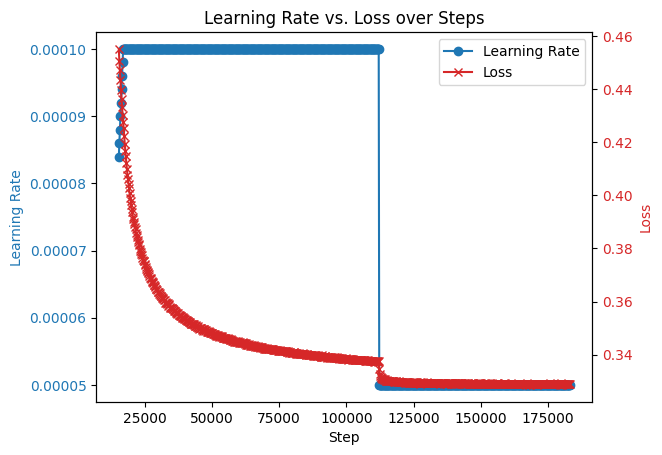

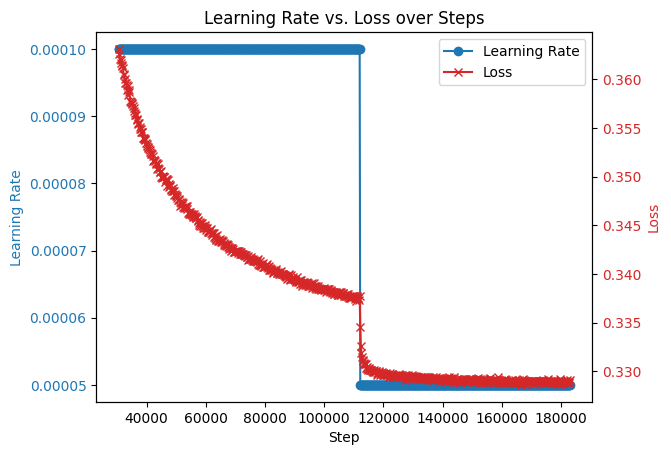

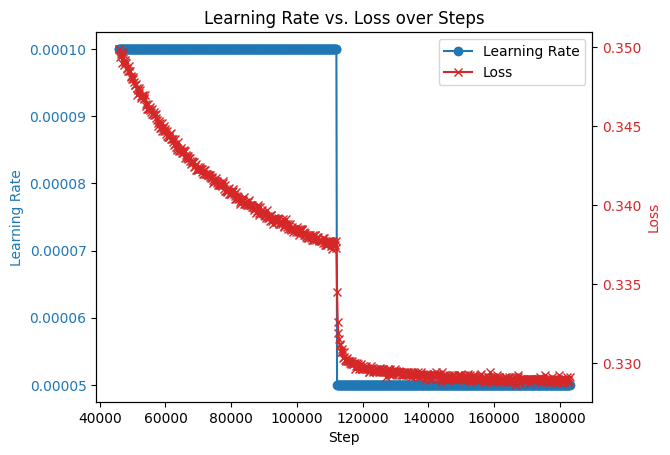

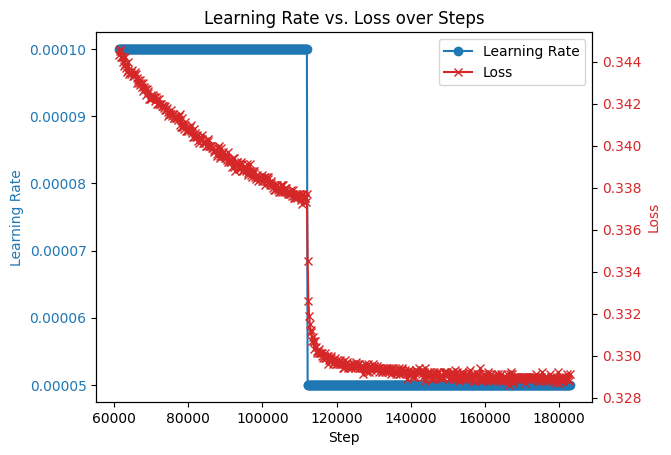

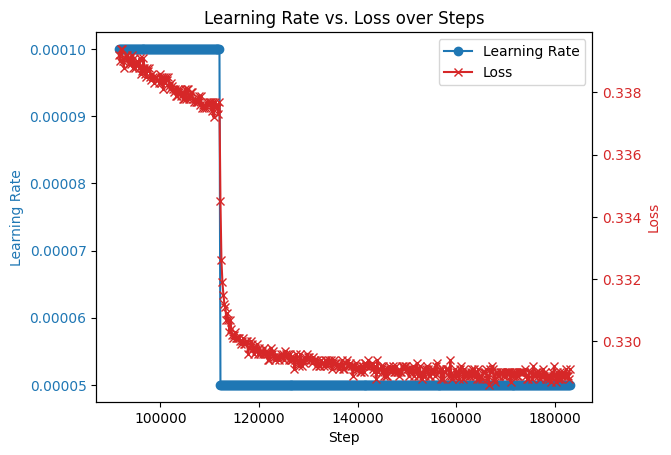

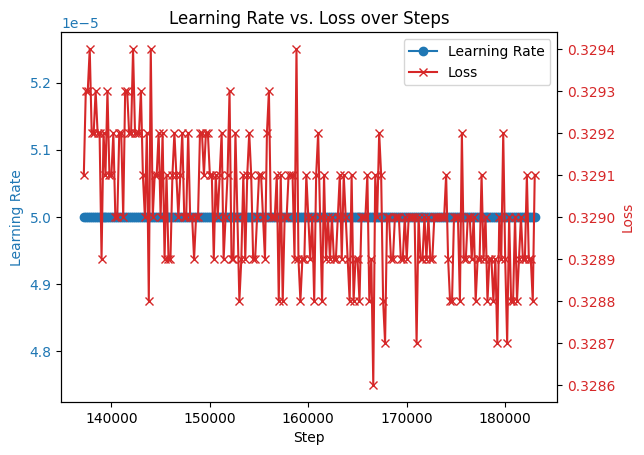

In [3]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# # Your data
# data = [
#     {'epoch': 1.56, 'learning_rate': 3.90625e-06, 'loss': 0.4483, 'step': 200},
#     # Add more data points as needed
# ]

# # Extract 'learning_rate', 'loss', and 'step' values from the data
# learning_rates = [item['learning_rate'] for item in data]
# losses = [item['loss'] for item in data]
# steps = [item['step'] for item in data]
# shift_step = 250001
# # Shift 'step' values
# shifted_steps = [step + shift_step for step in steps]

# steps = shifted_steps

def plot_state(steps_all, learning_rates_all, losses_all):
    # Create a plot with 'step' on the x-axis
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Step')
    ax1.set_ylabel('Learning Rate', color='tab:blue')
    ax1.plot(steps_all, learning_rates_all, color='tab:blue', label='Learning Rate', marker='o')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for 'loss'
    ax2 = ax1.twinx()
    ax2.set_ylabel('Loss', color='tab:red')
    ax2.plot(steps_all, losses_all, color='tab:red', label='Loss', marker='x')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Show the plot
    plt.title('Learning Rate vs. Loss over Steps')
    plt.show()

len_all = len(steps_all)
plot_state(steps_all[:], learning_rates_all[:], losses_all[:])
plot_state(steps_all[len_all//12:], learning_rates_all[len_all//12:], losses_all[len_all//12:])
plot_state(steps_all[len_all//6:], learning_rates_all[len_all//6:], losses_all[len_all//6:])
plot_state(steps_all[len_all//4:], learning_rates_all[len_all//4:], losses_all[len_all//4:])
plot_state(steps_all[len_all//3:], learning_rates_all[len_all//3:], losses_all[len_all//3:])
plot_state(steps_all[len_all//2:], learning_rates_all[len_all//2:], losses_all[len_all//2:])

pos = len_all//2 + len_all//4 
plot_state(steps_all[pos:], learning_rates_all[pos:], losses_all[pos:])


[3.3025, 3.3025, 3.2616, 3.2242, 3.1847, 3.1508, 3.1181, 3.0832, 3.0515, 3.0189, 2.9885, 2.958, 2.9283, 2.8984, 2.868, 2.8404, 2.8114, 2.7835, 2.7567, 2.7276, 2.7009, 2.6723, 2.6453, 2.6175, 2.5911, 2.5626, 2.5361, 2.5082, 2.4817, 2.455, 2.4286, 2.4017, 2.3751, 2.3489, 2.3237, 2.2992, 1.9654, 1.2294, 0.9423, 0.8669, 0.8325, 0.8095, 0.794, 0.7822, 0.7727, 0.7653, 0.758, 0.751, 0.7444, 0.738, 0.7305, 0.7237, 0.7158, 0.7077, 0.6985, 0.6885, 0.6779, 0.665, 0.6531, 0.6392, 0.6247, 0.6104, 0.5955, 0.5815, 0.5666, 0.5537, 0.5411, 0.5297, 0.5186, 0.5086, 0.5, 0.4914, 0.4842, 0.4774, 0.4713, 0.4652, 0.4603, 0.4551, 0.4506, 0.4472, 0.4434, 0.4395, 0.4364, 0.4331, 0.4303, 0.4275, 0.4254, 0.4222, 0.4194, 0.4168, 0.4146, 0.4121, 0.4098, 0.4078, 0.406, 0.4042, 0.4026, 0.4007, 0.399, 0.3977, 0.3963, 0.3948, 0.3938, 0.392, 0.3909, 0.3898, 0.3893, 0.388, 0.3872, 0.3858, 0.385, 0.3842, 0.383, 0.3824, 0.3815, 0.3812, 0.3799, 0.3792, 0.3787, 0.3779, 0.3774, 0.3765, 0.3758, 0.3754, 0.3751, 0.3741, 0.3737, 

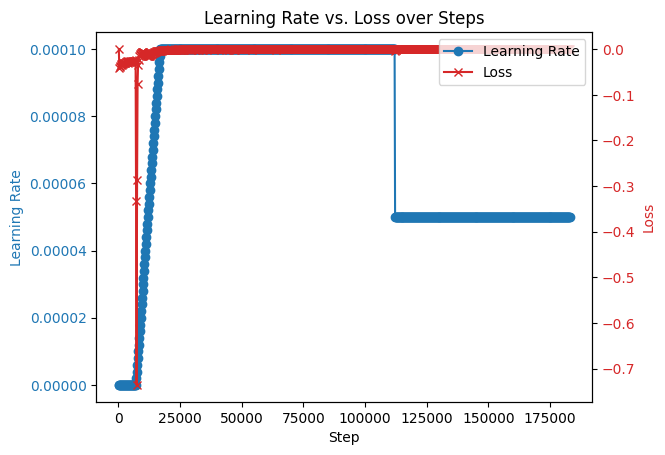

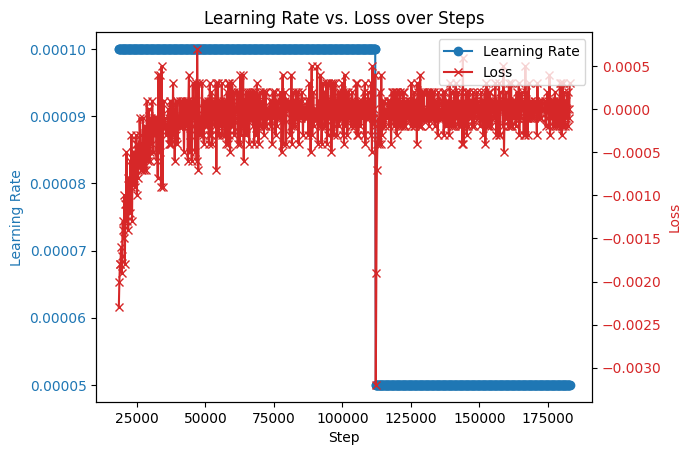

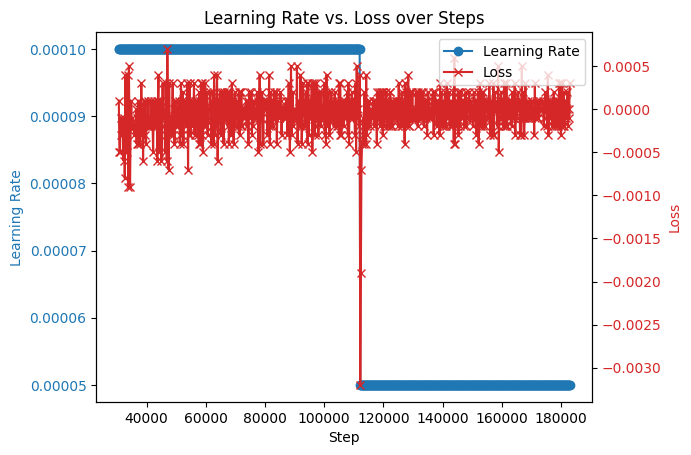

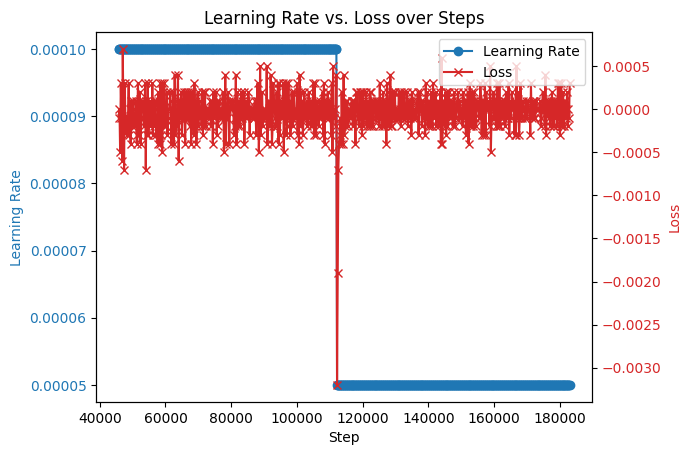

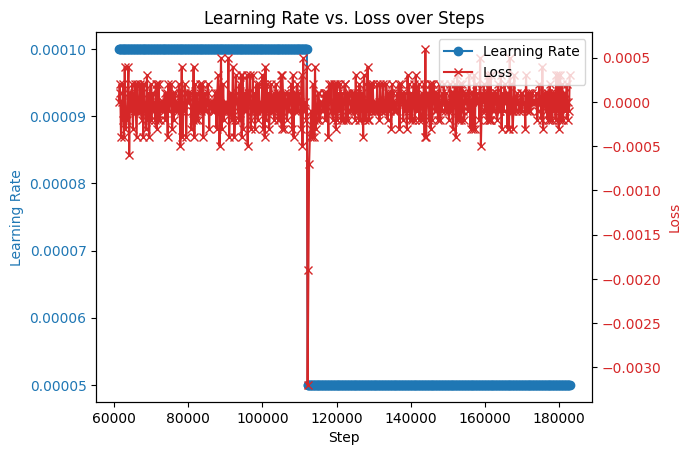

In [4]:
# Specify the number of positions to shift
shift_by = 1

# Shift the list to the right
shifted_list = losses_all[-shift_by:] + losses_all[:-shift_by]
shifted_list[0] = shifted_list[1]

print(shifted_list)
print(losses_all)

losses_all = [a - b for a, b in zip(losses_all, shifted_list)]
# losses_all = shifted_list - losses_all

len_all = len(steps_all)


plot_state(steps_all[:], learning_rates_all[:], losses_all[:])
plot_state(steps_all[len_all//10:], learning_rates_all[len_all//10:], losses_all[len_all//10:])
plot_state(steps_all[len_all//6:], learning_rates_all[len_all//6:], losses_all[len_all//6:])
plot_state(steps_all[len_all//4:], learning_rates_all[len_all//4:], losses_all[len_all//4:])
plot_state(steps_all[len_all//3:], learning_rates_all[len_all//3:], losses_all[len_all//3:])